### Study the overlap between the coherent tune and the incoherent spectrum by applying FFT on the tbt data of the bunch centroid motion. 

**Schottky method:**

- Track very few particles ~1e4, comparing to the 5e5 particles usually used for the simulations with impedance. There are not enough particles to compute the centroid with accuracy. This noise will result to the incoherent spectrum. That’s why a few particles are needed. Many turns are necessary (here 2**17)

- Note: Due to the small number of macroparticles, in the presence of the impedance most likely you will have some emittance growth. But it is negelted for now. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle5 as pickle
import pandas as pd
import os
import sys
sys.path.append('../../utils')
from cmpt_TuneSpreads import *
from coordinatesConversions import *

In [35]:
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 7,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)
plt.close('all')

In [3]:
def find_tune(a): # find and return the frequency with the maximum amplitude
    max_fft = max(a)
    my_index = [i for i, j in enumerate(a) if j == max_fft]
    return my_index

In [4]:
def cmpt_psd(n_turns, frev, fft):
    time = np.arange(int(n_turns))/frev # convert from turns to time
    Dt = time[1]-time[0] # sampling (s)
    #print(Dt)

    # freq = np.linspace(0, N/time[-1], N)  # [0, 2frev]
    freq_psd = np.fft.fftfreq(int(n_turns), Dt) # [-frev/2, frev/2]
    Df = freq_psd[1]-freq_psd[0]

    print('sampling ratio Df={}'.format(Df))
   
    #### To obtain a more precise value of PSD, we use the average of 10000 FFTs
    dft_1 = np.abs(fft)**2  
    PSD_1 = dft_1/(Df*(n_turns/2)**2) # power spectral density

    return freq_psd, PSD_1

### Study parameters

In [66]:
gamma = 287.8
beta = np.sqrt(1 - 1/gamma**2)
circumference = 6911.5623
frev = 299792458/circumference
n_turns = 2**17
intensity = 3.5e10

ayy, axy = 6000, 0.0
Qpy=0
wakes = 'ON'

In [67]:
intensity_scan = np.linspace(0, 5e10, 25)

### Load tbt data for each intensity value

In [68]:
load_from_afs = False

path2data ='/afs/cern.ch/work/n/natriant/private/pyheadtail_example_crabcavity/'
study_name=f'sps_forSchottky_tbt_270GeV_NoNoise_WakesON_ayy{ayy}_QpxQpy{Qpy}_6D_InitialOffsetY1e-4m_Intensity'

#### Load all data in a dictionary and damp in a data frame

In [69]:
if load_from_afs:
    meanY_list, meanX_list = [], []
    emitY_list, emitX_list = [], []


    for intensity in intensity_scan:
        print(intensity) # print to see the progress
        meanX, meanY, emitX, emitY = np.loadtxt(path2data+f'{study_name}{intensity/1e10:.2f}e10_fixedKicksSet0_run0/file.txt', delimiter = ",", unpack = True)
        meanX_list.append(meanX)
        meanY_list.append(meanY)
        emitX_list.append(emitX)
        emitY_list.append(emitY)
        
    data = {}
    for i, intensity in enumerate(intensity_scan):
        data[f'intensity_{intensity/1e10:.2f}e10'] =[meanX_list[i], meanY_list[i], emitX_list[i], emitY_list[i]]
    df = pd.DataFrame(data, index=['meanX','meanY','emitX', 'emitY'])

savedata=False
if savedata:
    filename = f'tbtData_{study_name}Scan.pkl'
    if not os.path.exists(filename):
        df.to_pickle(filename)

#### Load tbt data from a pickle file

In [70]:
if not load_from_afs:
    print('Load from file')
    df = pickle.load(open(f'tbtData_sps_forSchottky_tbt_270GeV_NoNoise_WakesON_ayy{ayy}_QpxQpy{Qpy}_6D_InitialOffsetY1e-4m_IntensityScan.pkl', 'rb'))

Load from file


In [71]:
df

,intensity_0.00e10,intensity_0.21e10,intensity_0.42e10,intensity_0.62e10,intensity_0.83e10,intensity_1.04e10,intensity_1.25e10,intensity_1.46e10,intensity_1.67e10,intensity_1.88e10,...,intensity_3.12e10,intensity_3.33e10,intensity_3.54e10,intensity_3.75e10,intensity_3.96e10,intensity_4.17e10,intensity_4.38e10,intensity_4.58e10,intensity_4.79e10,intensity_5.00e10
meanX,"[-7.478315463312533e-06, -7.837867162309222e-0...","[6.231723008340725e-06, 6.991892390462479e-06,...","[1.1555360982864994e-06, 3.748740560382369e-06...","[-6.345785024304016e-06, -3.6968694415770824e-...","[-3.478514548431921e-06, -3.1716002751494764e-...","[3.3919396185988993e-06, 2.7206920810079236e-0...","[-2.1561699047502085e-06, -4.074092299695914e-...","[-4.572532614220581e-06, -8.688800532740267e-0...","[6.353602825873689e-07, -3.4560916179653645e-0...","[6.511941981804763e-08, -6.377222590459296e-06...",...,"[4.489024627680798e-06, 3.3961901366499445e-06...","[-8.611920865957926e-06, -1.308725980305187e-0...","[6.454080341686675e-06, 8.135747078407808e-06,...","[-2.717223840854455e-06, 2.2699867363072998e-0...","[8.495346159359553e-07, 2.5647749792431027e-06...","[4.8976836821743884e-06, 1.5176217752179742e-0...","[-1.07004833849234e-06, 1.2211672648972626e-08...","[-2.930151978776798e-06, -3.3182521899664377e-...","[5.065826350469628e-06, -2.6956377665068714e-0...","[-7.416573998860016e-07, 1.9325517349078795e-0..."
meanY,"[4.0688202186698794e-05, -6.492617211889433e-0...","[4.5410248990747725e-05, -7.734938801633955e-0...","[4.8591055379071564e-05, -7.092980862791696e-0...","[4.1412412837326386e-05, -6.709664989731081e-0...","[5.161003195705887e-05, -6.525710168210696e-05...","[4.467820289314406e-05, -5.700716999338069e-05...","[4.721178947445007e-05, -6.461858347446144e-05...","[4.2438777264723364e-05, -7.19329924916389e-05...","[5.01485944330517e-05, -6.425264700429962e-05,...","[3.285813804539435e-05, -6.624514601441124e-05...",...,"[3.754714533138495e-05, -6.652750435311909e-05...","[4.430501131330914e-05, -6.389464034119273e-05...","[3.849734704396918e-05, -7.03725770559193e-05,...","[5.047004445208886e-05, -5.773775455149046e-05...","[5.2971910940379164e-05, -6.009375381276883e-0...","[3.919727177200464e-05, -7.858720158421762e-05...","[3.953467035213915e-05, -6.58952703669898e-05,...","[5.164100998796577e-05, -6.916292395852537e-05...","[4.489297408357053e-05, -7.468742692238167e-05...","[4.519548852972218e-05, -5.1537861013003575e-0..."
emitX,"[1.964859784642997e-06, 1.9648860146079307e-06...","[1.994466978908011e-06, 1.994463913326243e-06,...","[2.005453694734606e-06, 2.0054494419194847e-06...","[1.9776836864467964e-06, 1.977676968298615e-06...","[1.985932735664264e-06, 1.9859338800756388e-06...","[2.0198106645535223e-06, 2.0198174446101427e-0...","[1.9737380665015783e-06, 1.97372686814935e-06,...","[2.001947514056464e-06, 2.0019585891411696e-06...","[2.003432626698658e-06, 2.003429589230716e-06,...","[2.0091419853193264e-06, 2.0091310695070495e-0...",...,"[1.948035885568079e-06, 1.948038612685617e-06,...","[2.0120928531088996e-06, 2.012083140328472e-06...","[1.9613549909003126e-06, 1.9613573959242994e-0...","[1.97892074222798e-06, 1.9789222659858566e-06,...","[1.9817379632164785e-06, 1.981694810653149e-06...","[2.022440065229282e-06, 2.0224369115302296e-06...","[1.971097562788927e-06, 1.9710922777979375e-06...","[1.9947453872584756e-06, 1.9947022878420673e-0...","[2.0106940063570165e-06, 2.0107283554116886e-0...","[2.0128185106341342e-06, 2.012806923586346e-06..."
emitY,"[1.964859784642997e-06, 1.9648860146079307e-06...","[1.994466978908011e-06, 1.994463913326243e-06,...","[2.005453694734606e-06, 2.0054494419194847e-06...","[1.9776836864467964e-06, 1.977676968298615e-06...","[1.985932735664264e-06, 1.9859338800756388e-06...","[2.0198106645535223e-06, 2.0198174446101427e-0...","[1.9737380665015783e-06, 1.97372686814935e-06,...","[2.001947514056464e-06, 2.0019585891411696e-06...","[2.003432626698658e-06, 2.003429589230716e-06,...","[2.0091419

### Load dey/dt vs Intensity Data

Location:cernbox/pyheadtail_data/1Feb2021/dey_dipoleNoise_intensityScan

In [73]:
dey_vs_intensity = pickle.load(open(f'deyRates_sps_270GeV_dipoleNoise_1e-8sqrt2_QpxQpy{Qpy}_ayy{ayy}_intensityScan.pkl', 'rb'))

In [74]:
dey_vs_intensity

,intensity_0.00e10,intensity_0.21e10,intensity_0.42e10,intensity_0.62e10,intensity_0.83e10,intensity_1.04e10,intensity_1.25e10,intensity_1.46e10,intensity_1.67e10,intensity_1.88e10,...,intensity_3.12e10,intensity_3.33e10,intensity_3.54e10,intensity_3.75e10,intensity_3.96e10,intensity_4.17e10,intensity_4.38e10,intensity_4.58e10,intensity_4.79e10,intensity_5.00e10
m,"[2.9518241875890507e-08, 2.493927794499111e-08...","[3.1645961075300576e-08, 2.4996044326552594e-0...","[3.64262864681087e-08, 2.4374630017491637e-08,...","[4.446602505194696e-08, 2.611062990330555e-08,...","[3.449614212988186e-08, 2.6246897013123707e-08...","[2.4607125259306984e-08, 1.9268461434270413e-0...","[1.978563106924352e-08, 1.4233063884810408e-08...","[1.7692108501288966e-08, 9.328874258169139e-09...","[1.642548056599191e-08, 1.1627734587367493e-08...","[1.733709684980852e-08, 2.205891318604574e-08,...",...,"[9.288794959830335e-09, 1.4976353947650358e-08...","[1.0017989366537837e-08, 6.806997887767938e-09...","[7.214031656587302e-09, 5.994000714486342e-09,...","[8.717678396566745e-09, 8.688081437113787e-09,...","[1.0700774339038308e-08, 5.928992626073479e-09...","[9.233700201567734e-09, 1.3504854494790073e-08...","[6.734941069980054e-09, 5.0288638621735835e-09...","[1.2825207165871875e-08, 7.272187450421498e-09...","[8.620707686073994e-09, 7.97124324305804e-09, ...","[2.3318922299838414e-08, 4.562307421749361e-09..."
b,"[2.063492581535063e-06, 2.057745880434229e-06,...","[2.062114042890057e-06, 2.057711402275475e-06,...","[2.058173178046662e-06, 2.058074859978972e-06,...","[2.054113461291045e-06, 2.0564435851820087e-06...","[2.056593898288169e-06, 2.058189754462324e-06,...","[2.0584497492145907e-06, 2.063240126829542e-06...","[2.063532475595903e-06, 2.0669379853552106e-06...","[2.0620637647966353e-06, 2.0639541470845824e-0...","[2.0607564751943966e-06, 2.0625175229163503e-0...","[2.0567235148512924e-06, 2.0598259242188875e-0...",...,"[2.0596592606904504e-06, 2.0556972994696083e-0...","[2.0623172782930945e-06, 2.059668738936701e-06...","[2.0604088311462247e-06, 2.0605707227794665e-0...","[2.0591583090632174e-06, 2.0633166851066826e-0...","[2.059386684013914e-06, 2.0646649071621964e-06...","[2.05636037540653e-06, 2.0564555535784703e-06,...","[2.0600041959992755e-06, 2.061321190756943e-06...","[2.059233712917389e-06, 2.0614499451560528e-06...","[2.0618075822973734e-06, 2.0638540284726913e-0...","[2.0579909070214636e-06, 2.062864035058853e-06..."
err,"[2.11879654842749e-10, 1.4808938384314402e-10,...","[1.8818529081356685e-10, 1.429714873357038e-10...","[1.5927569179439034e-10, 1.369429588620281e-10...","[1.913156698133951e-10, 1.5316647957364152e-10...","[1.7388687575168742e-10, 1.6873415585386543e-1...","[1.4757056235615682e-10, 2.5132805257154576e-1...","[2.0331649381072102e-10, 2.2535737389463364e-1...","[2.0644989444565263e-10, 1.5123916226758872e-1...","[1.6700164295049887e-10, 1.8758222313931672e-1...","[1.9582909022911646e-10, 1.8231005881902328e-1...",...,"[1.5840815525837072e-10, 2.0794868650971288e-1...","[1.635572248168992e-10, 1.2617526932912015e-10...","[1.2112004152387787e-10, 1.3559479146177022e-1...","[1.3667133624696708e-10, 2.0338027884780845e-1...","[1.5513229225634207e-10, 1.7812534370365325e-1...","[1.5228355434544697e-10, 1.89809731544152e-10,...","[1.2482337009984079e-10, 1.3953050098746036e-1...","[1.6640149200446023e-10, 1.437575668242002e-10...","[1.7236890664168686e-10, 1.5105039554977534e-1...","[3.4407406275413417e-10, 1.2136394517612366e-1..."


In [75]:
dey_vs_intensity[f'intensity_{intensity_scan[0]/1e10:.2f}e10']['m']

[2.9518241875890507e-08,
 2.493927794499111e-08,
 2.9383162693492917e-08,
 3.247197827005916e-08,
 2.8028506914840562e-08,
 2.087960222272957e-08,
 2.7665281962423515e-08,
 1.5583402040749336e-08,
 2.6974026522080135e-08,
 2.9993361701145705e-08,
 1.8576808093714603e-08,
 2.5583871805045046e-08,
 2.2925281614298037e-08,
 2.0084735054539266e-08,
 3.068715619783456e-08,
 1.2546267038739609e-08,
 1.8816672050536497e-08,
 2.147230356271286e-08,
 2.7516216764757427e-08,
 3.1344313379437094e-08]

### Compute the <dey/dt> and the corresponding error bars for each intensity value

In [76]:
mean_dey = []
err_dey = []
for intensity in intensity_scan:
    mean_dey.append(np.mean(dey_vs_intensity[f'intensity_{intensity/1e10:.2f}e10']['m'])) # m/s
    
    # cmpt errors for study
    systematic_error = np.std(dey_vs_intensity[f'intensity_{intensity/1e10:.2f}e10']['m'])
    statistical_error = np.sqrt(np.mean(np.array(dey_vs_intensity[f'intensity_{intensity_scan[0]/1e10:.2f}e10']['err'])**2))
    total_error = np.sqrt(systematic_error**2+statistical_error**2)
    
    err_dey.append(total_error)
    

### Plot the dey/dt vs intensity (ax1) vs PSD  (ax2)

sampling ratio Df=0.3309287886438057
tune freq [0.18011475]
sampling ratio Df=0.3309287886438057
tune freq [0.18006897]
sampling ratio Df=0.3309287886438057
tune freq [0.18001556]
sampling ratio Df=0.3309287886438057
tune freq [0.17998505]
sampling ratio Df=0.3309287886438057
tune freq [0.17997742]
sampling ratio Df=0.3309287886438057
tune freq [0.17995453]
sampling ratio Df=0.3309287886438057
tune freq [0.1799469]
sampling ratio Df=0.3309287886438057
tune freq [0.17992401]
sampling ratio Df=0.3309287886438057
tune freq [0.17990112]
sampling ratio Df=0.3309287886438057
tune freq [0.17987823]
sampling ratio Df=0.3309287886438057
tune freq [0.17985535]
sampling ratio Df=0.3309287886438057
tune freq [0.17983246]
sampling ratio Df=0.3309287886438057
tune freq [0.17980957]
sampling ratio Df=0.3309287886438057
tune freq [0.17978668]
sampling ratio Df=0.3309287886438057
tune freq [0.17976379]
sampling ratio Df=0.3309287886438057
tune freq [0.17973328]
sampling ratio Df=0.3309287886438057
tune

/home/natalia/anaconda3/envs/run_pyheadtail/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


sampling ratio Df=0.3309287886438057
tune freq [0.17961121]
sampling ratio Df=0.3309287886438057
tune freq [0.17958832]
sampling ratio Df=0.3309287886438057
tune freq [0.1795578]
sampling ratio Df=0.3309287886438057
tune freq [0.17954254]
sampling ratio Df=0.3309287886438057
tune freq [0.17951202]


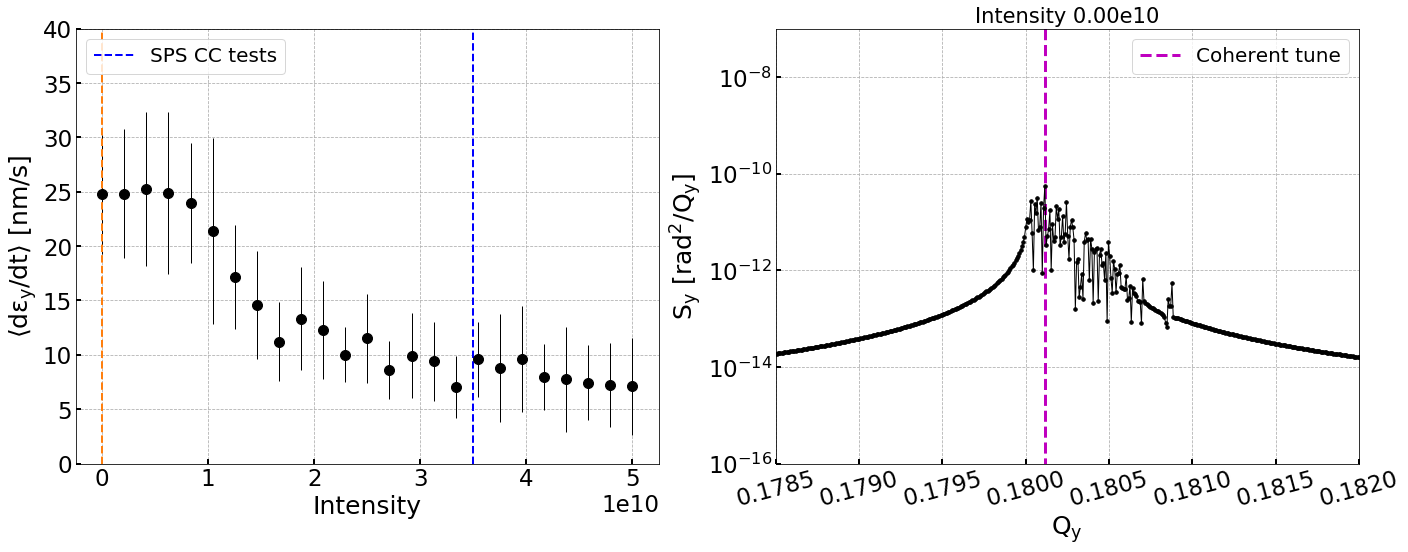

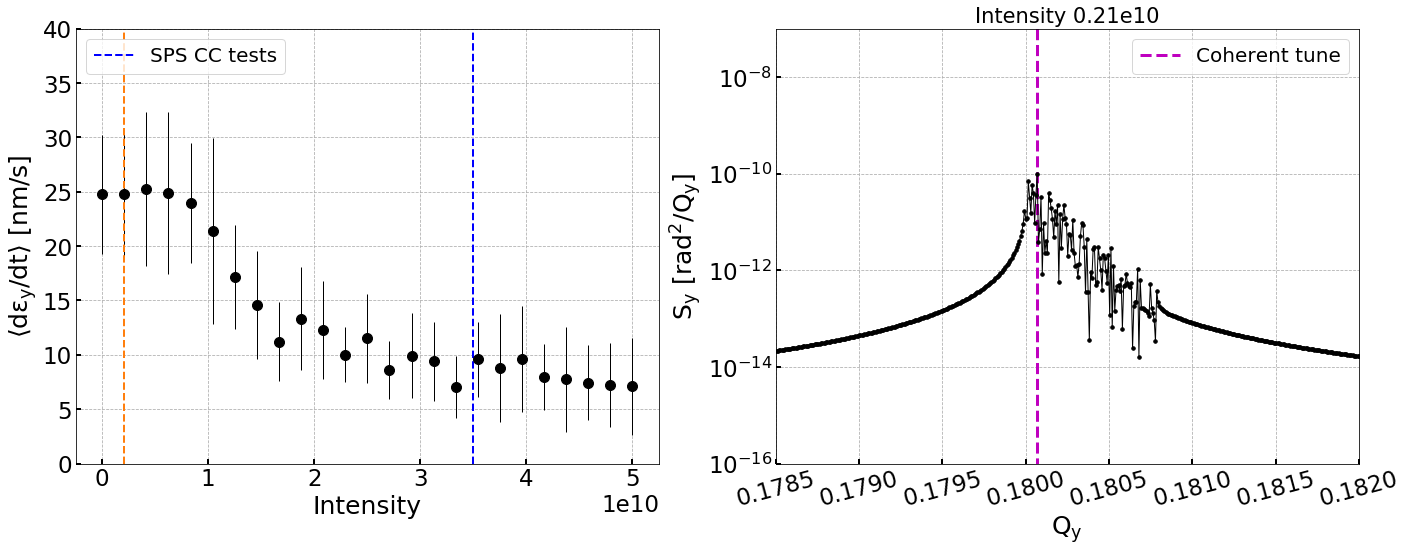

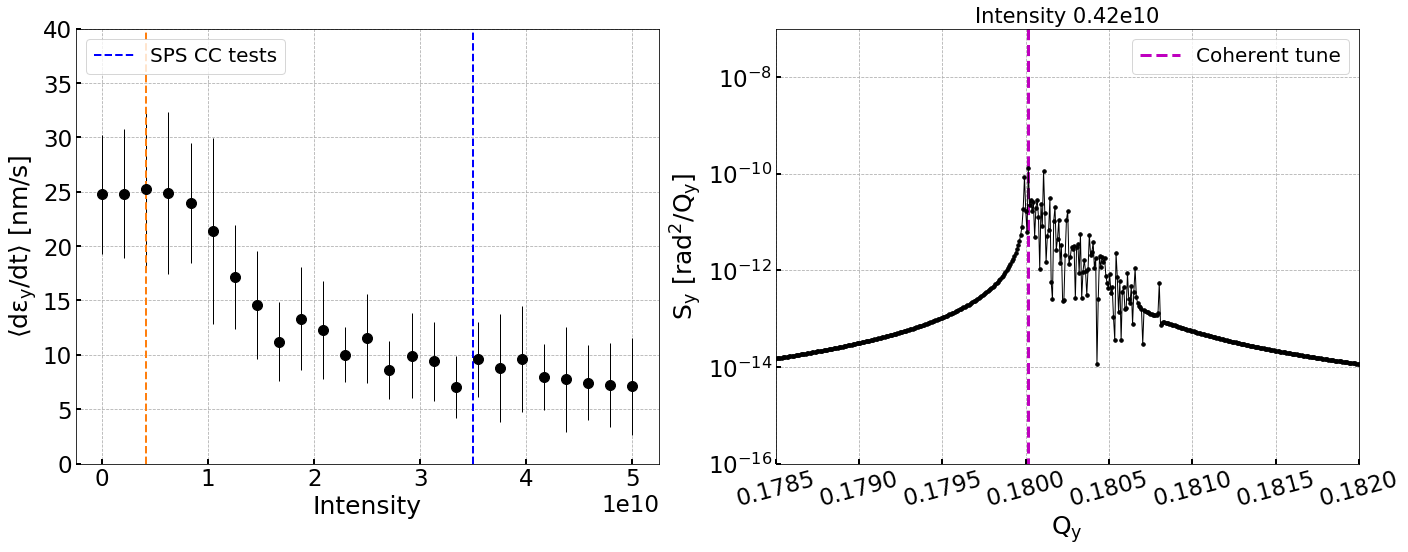

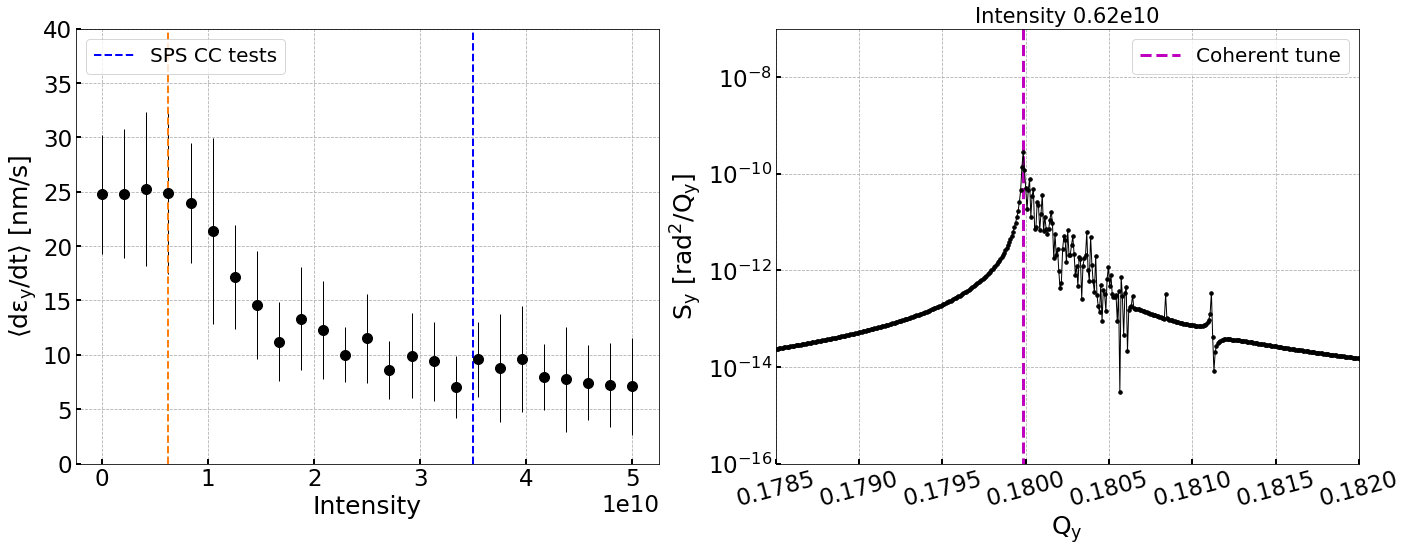

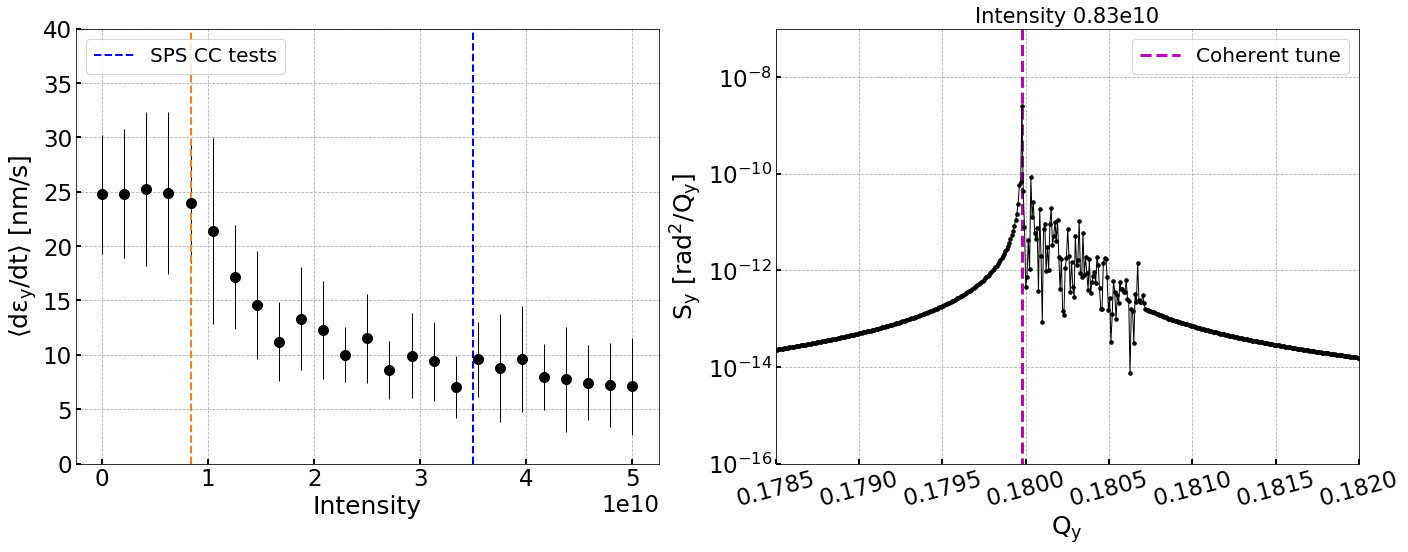

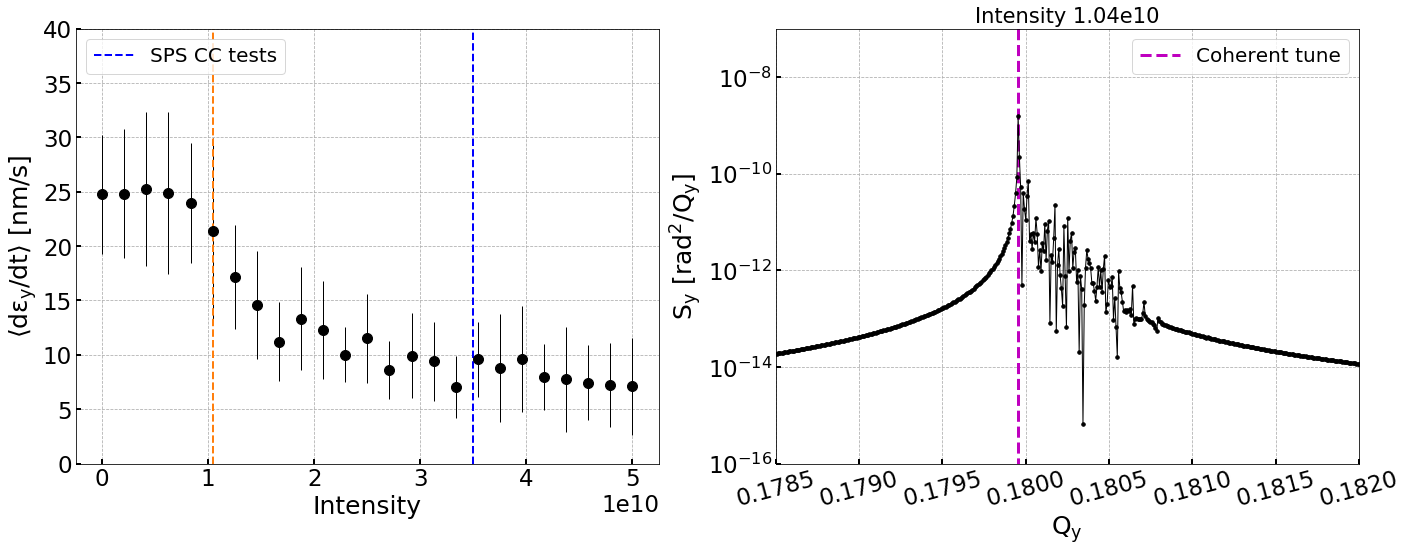

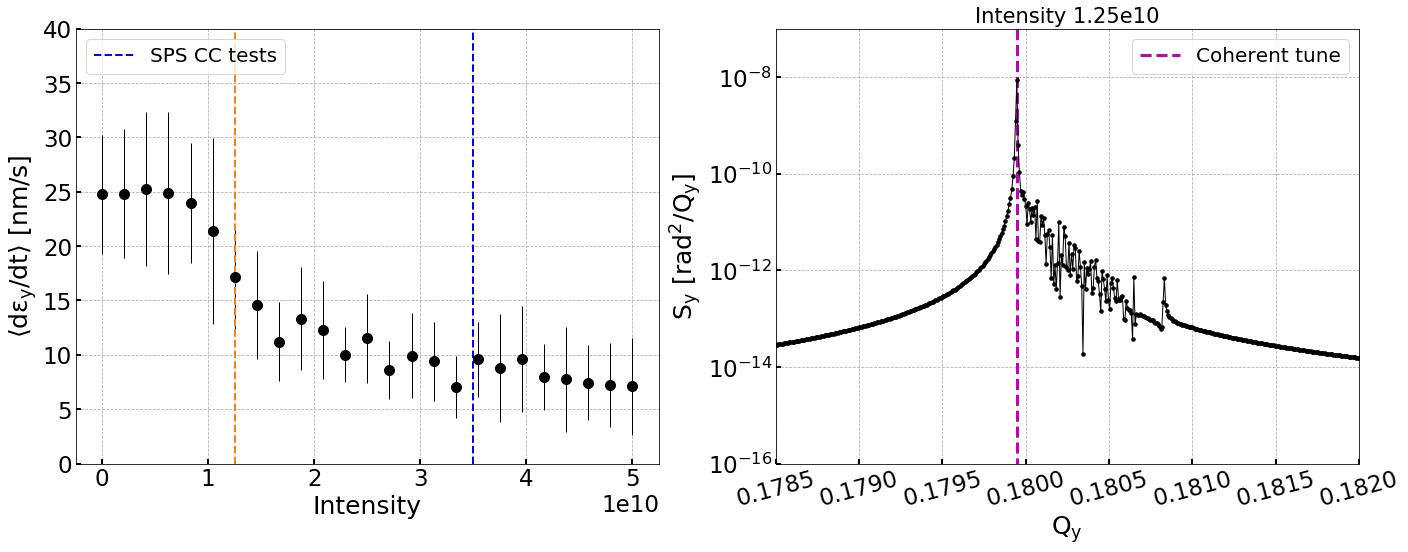

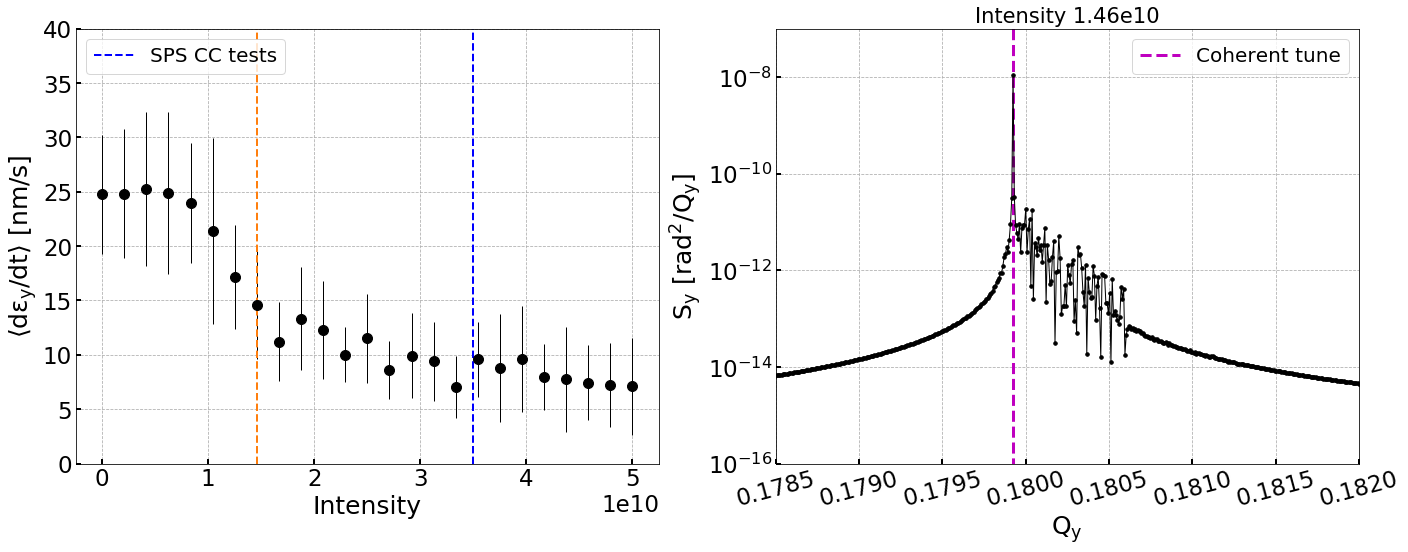

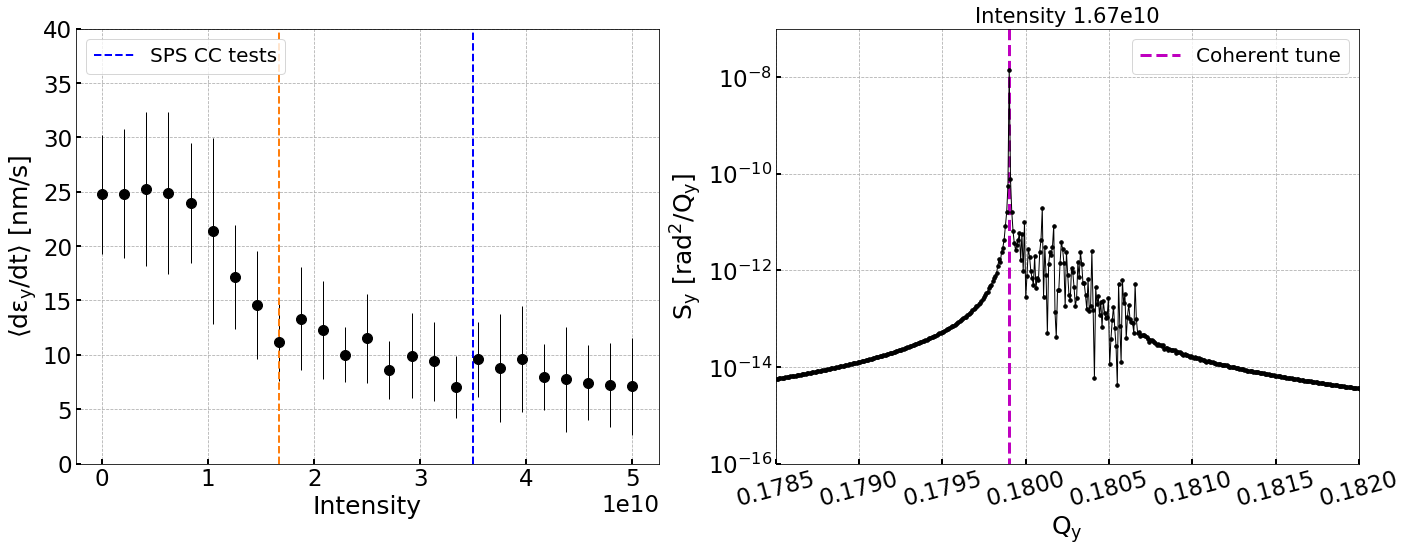

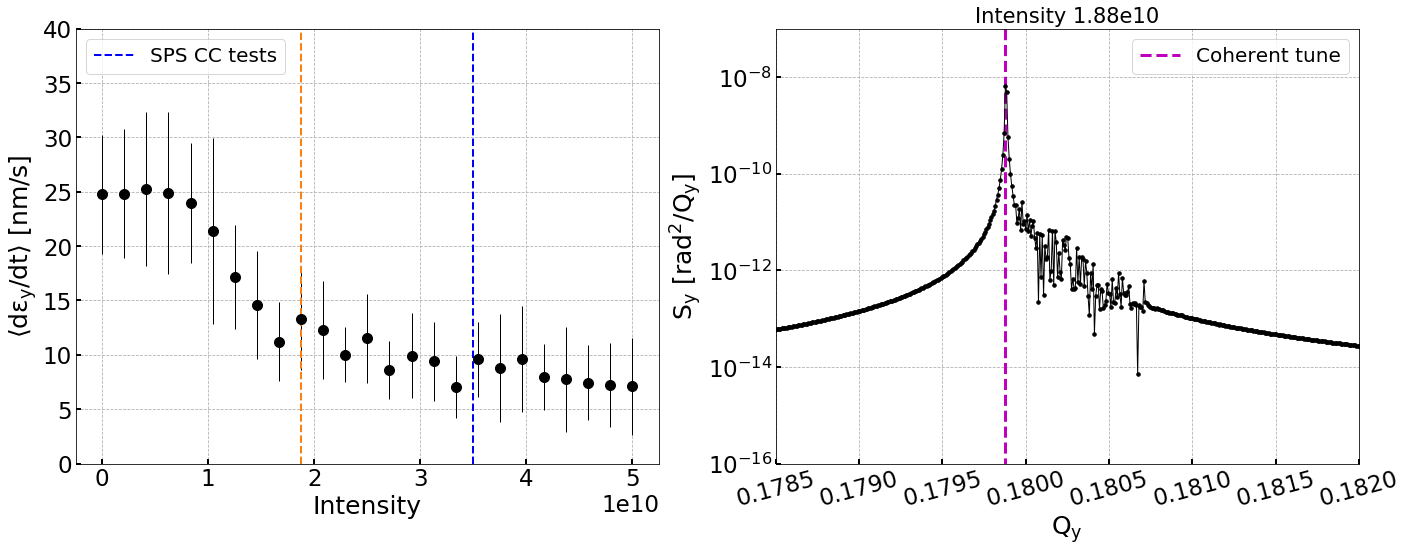

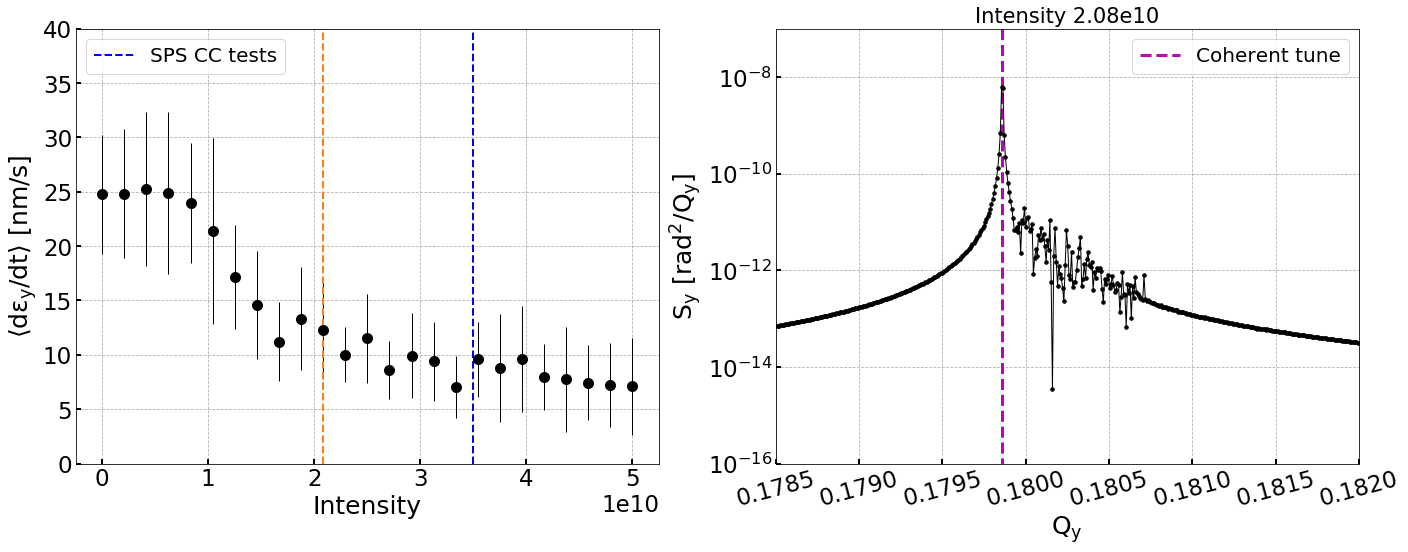

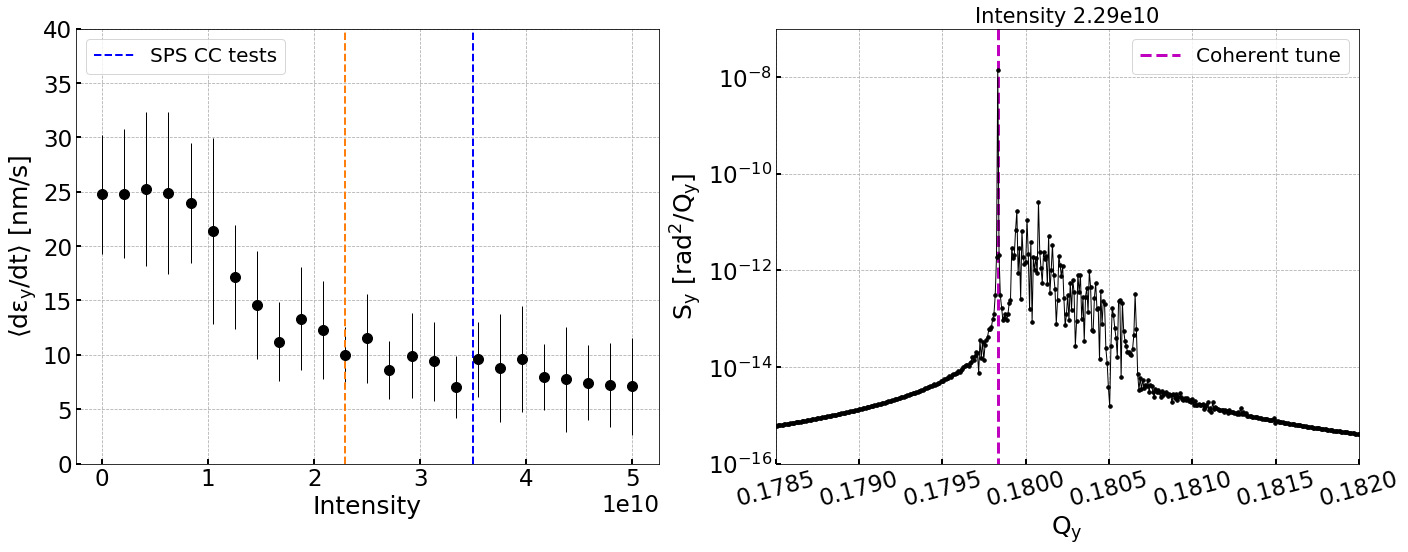

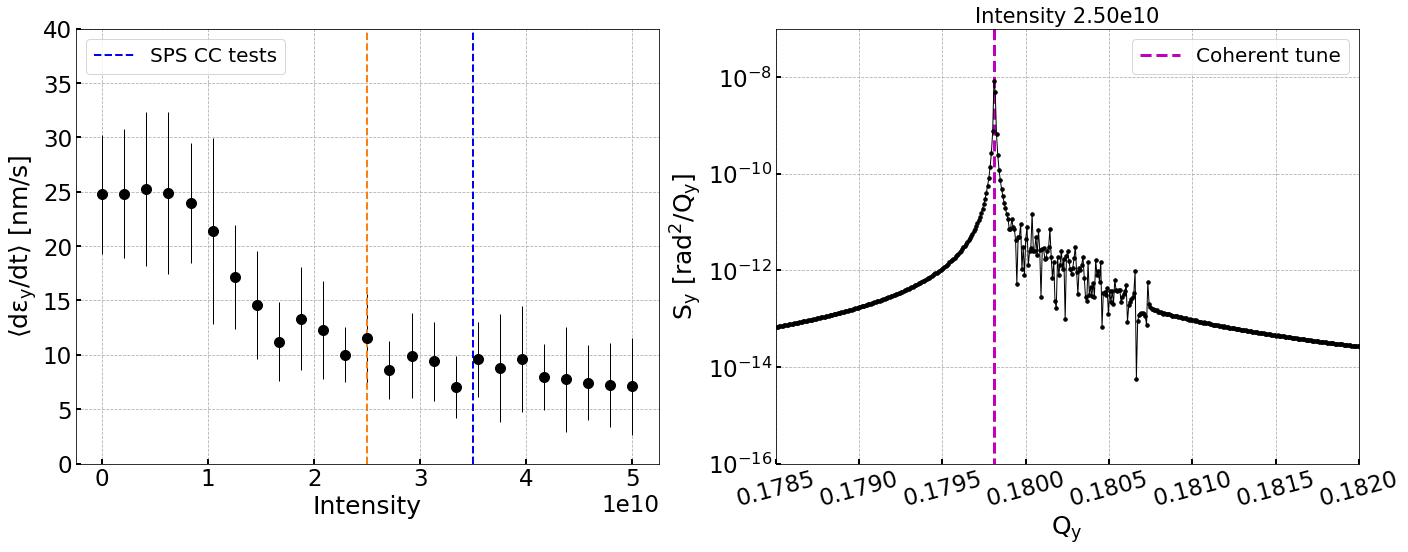

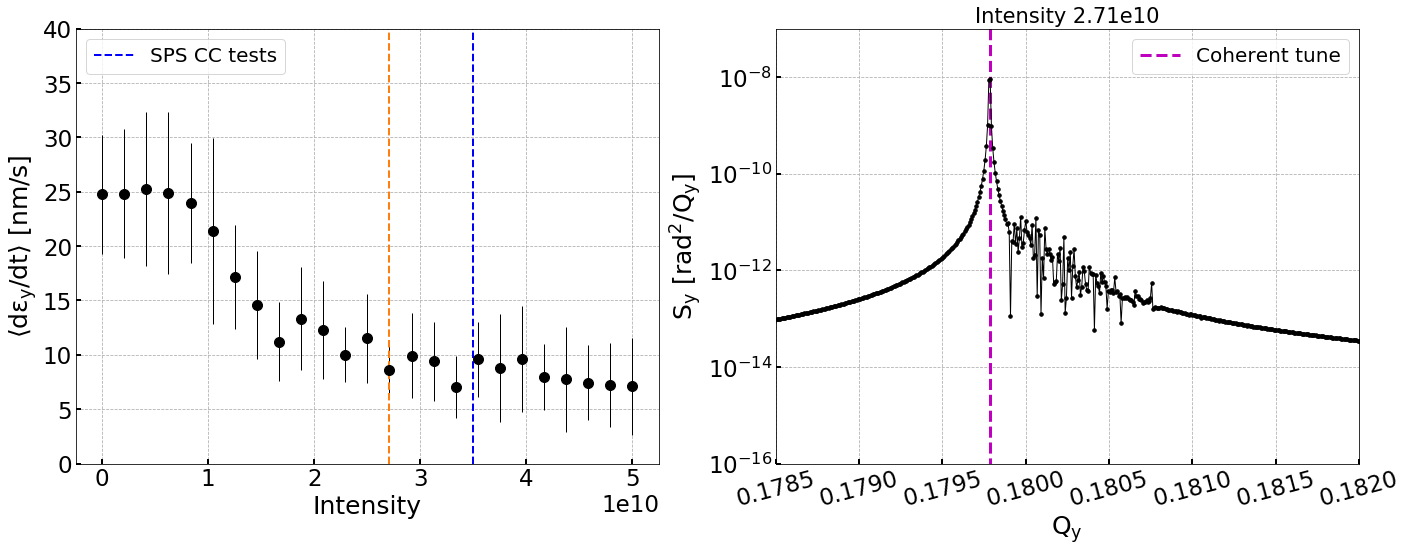

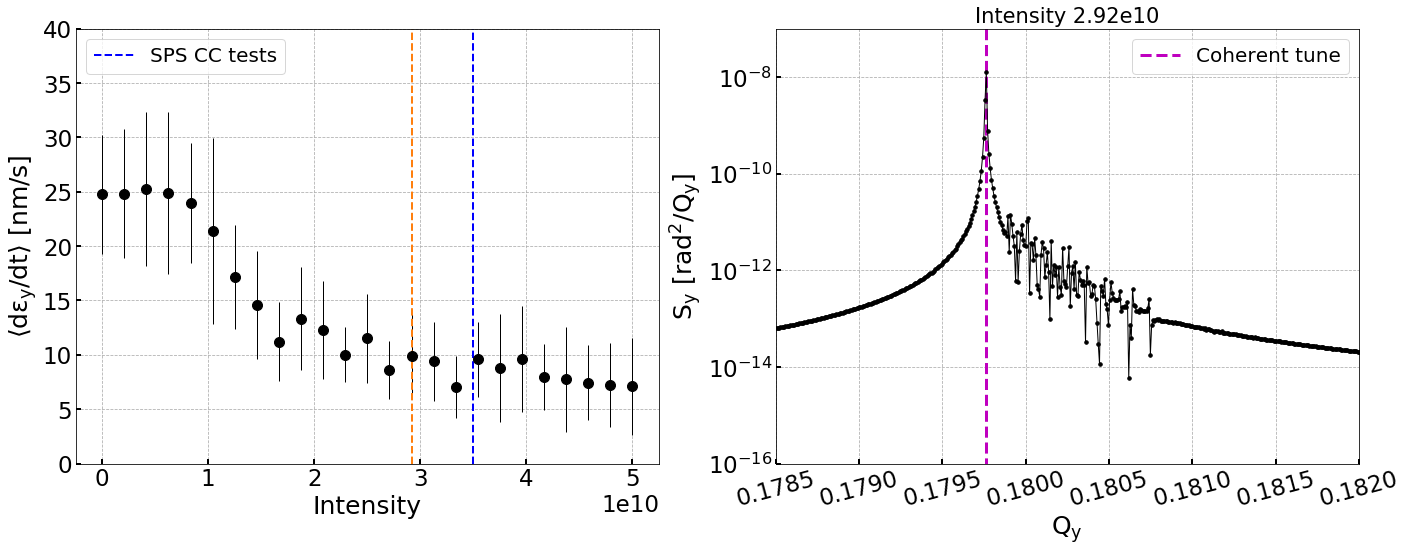

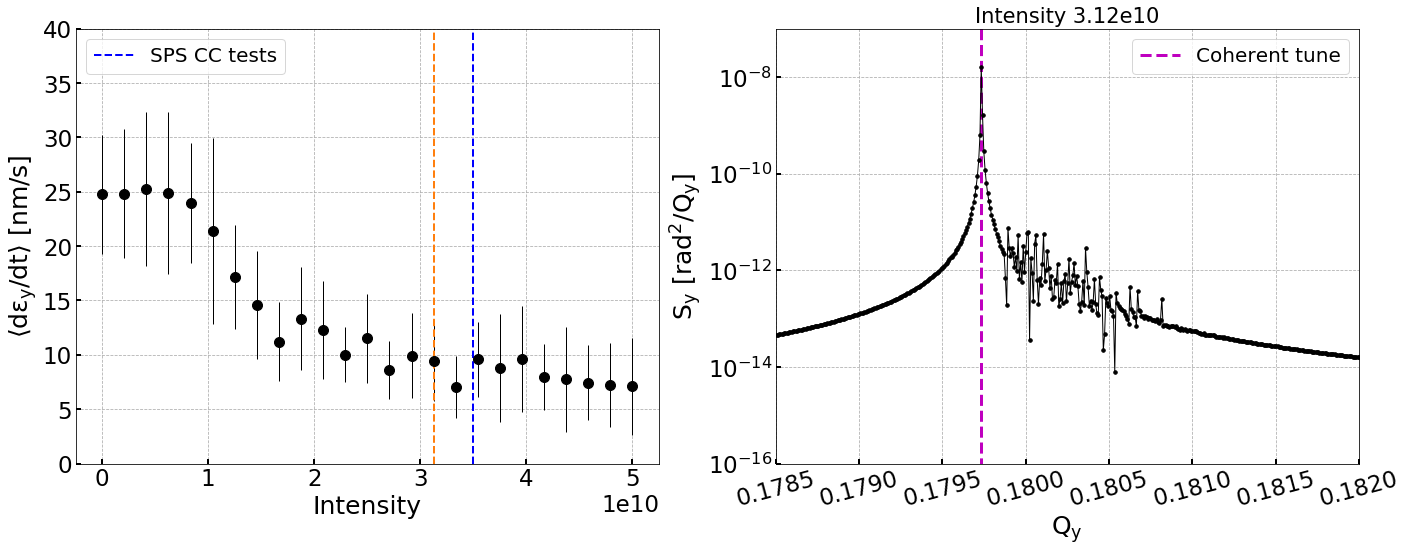

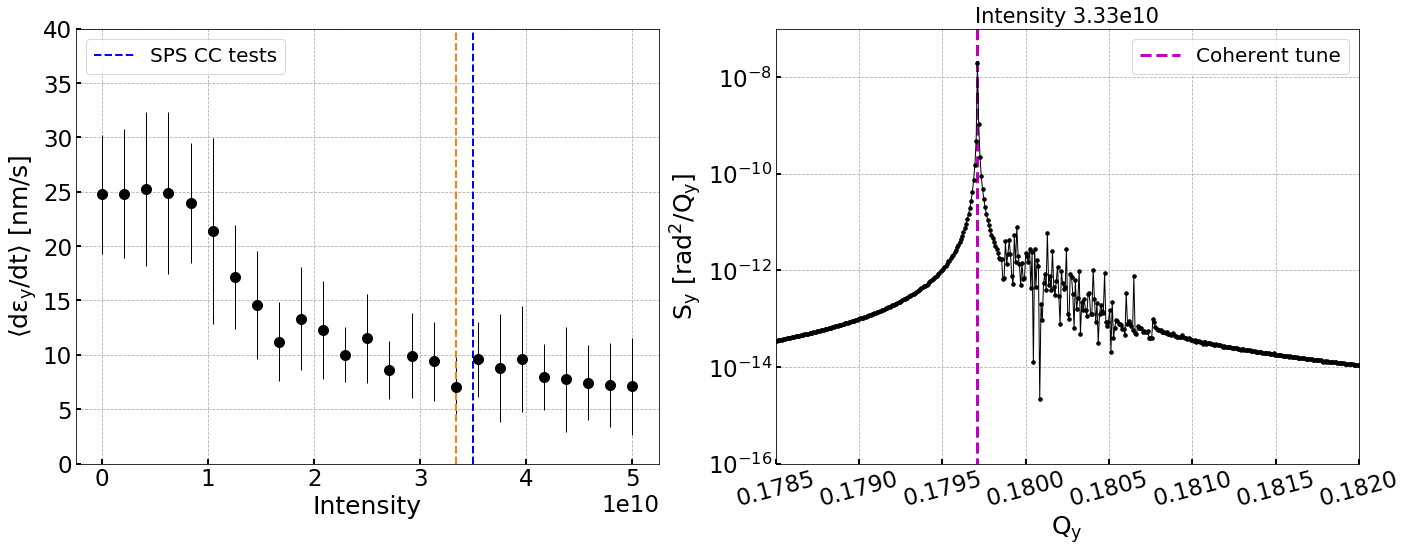

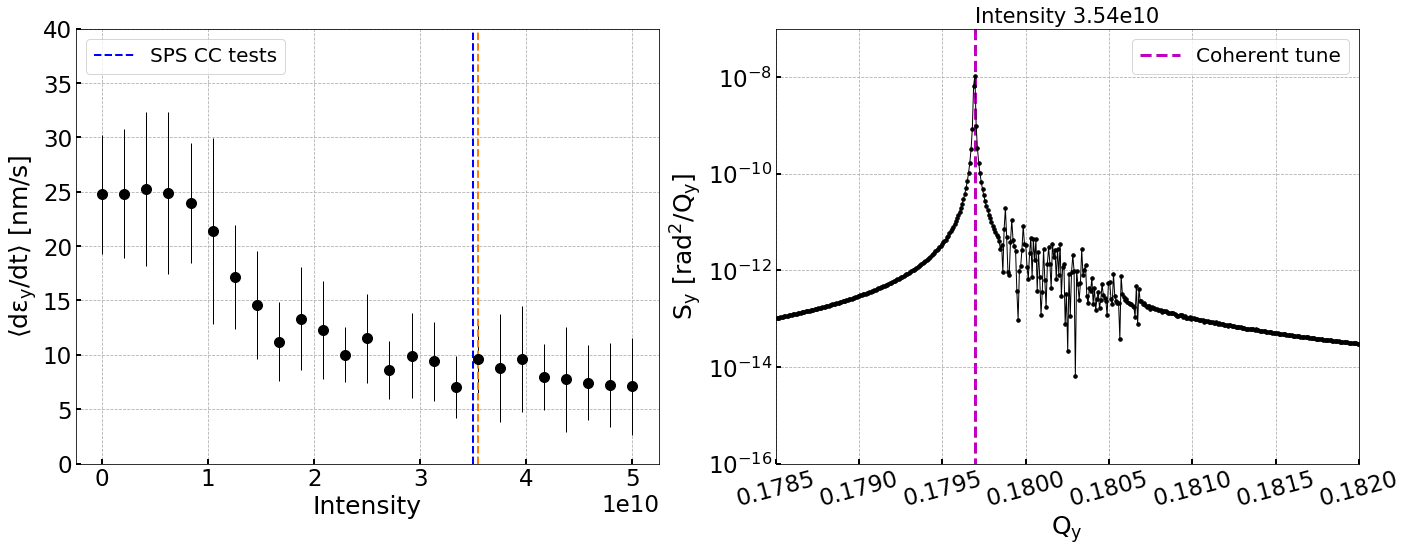

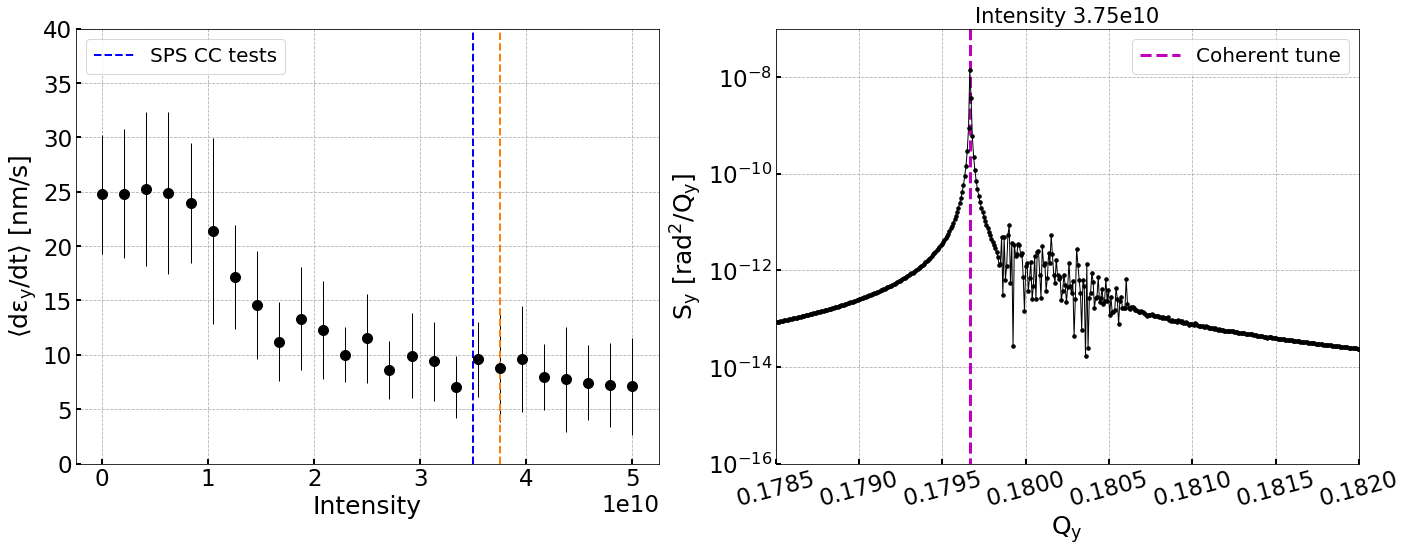

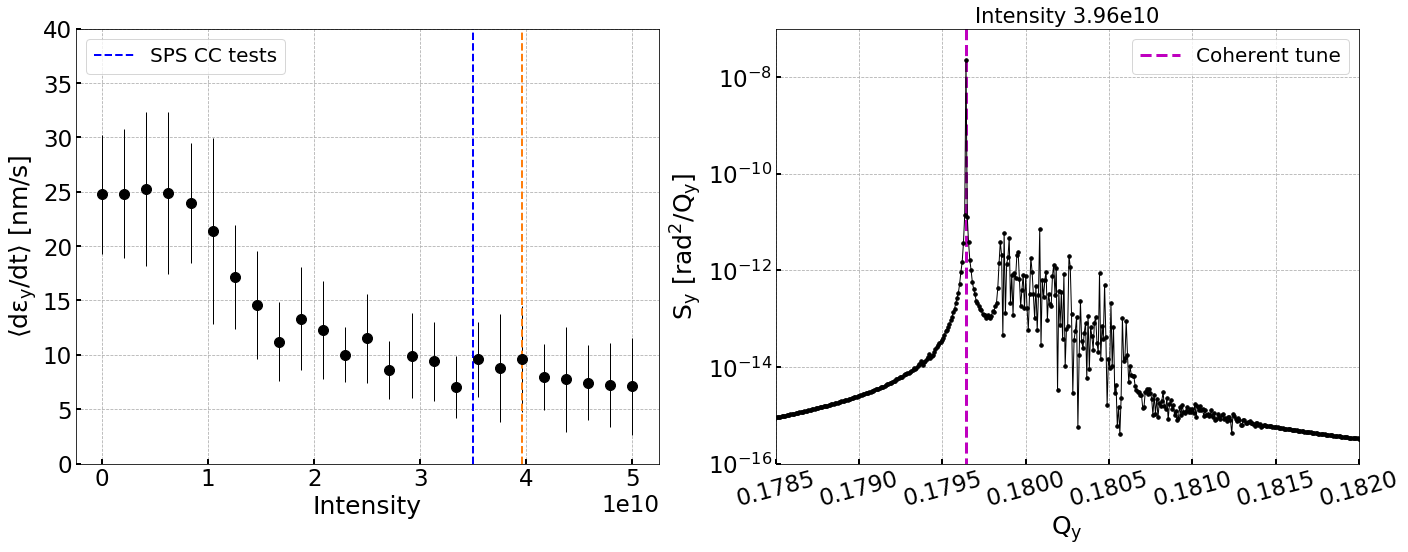

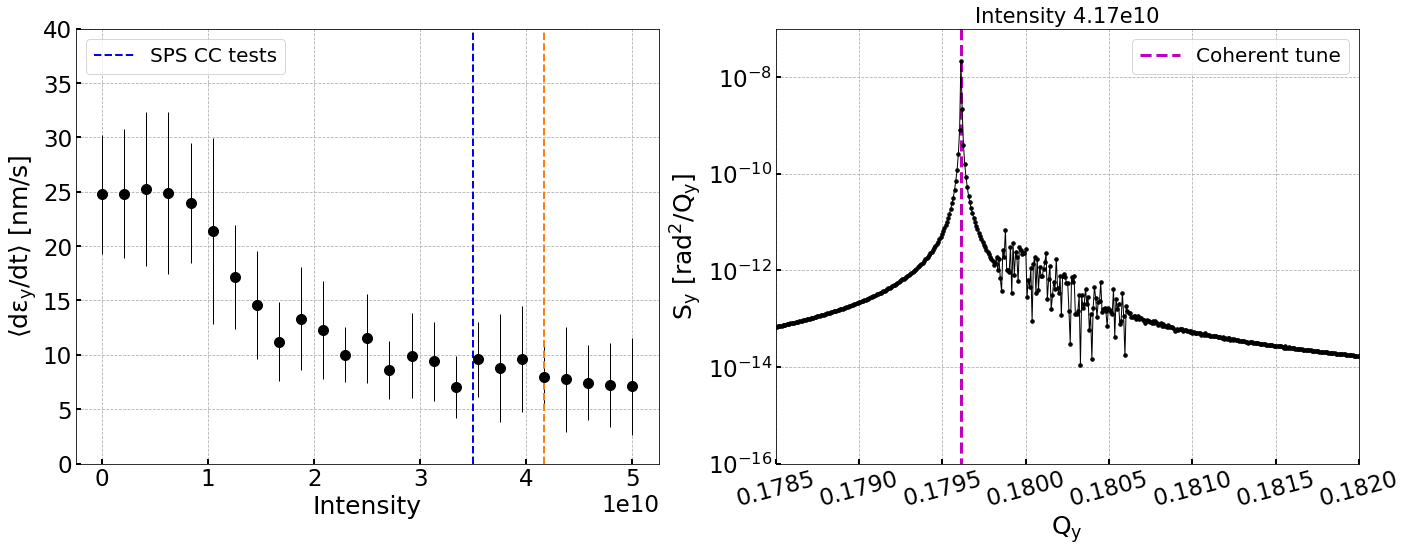

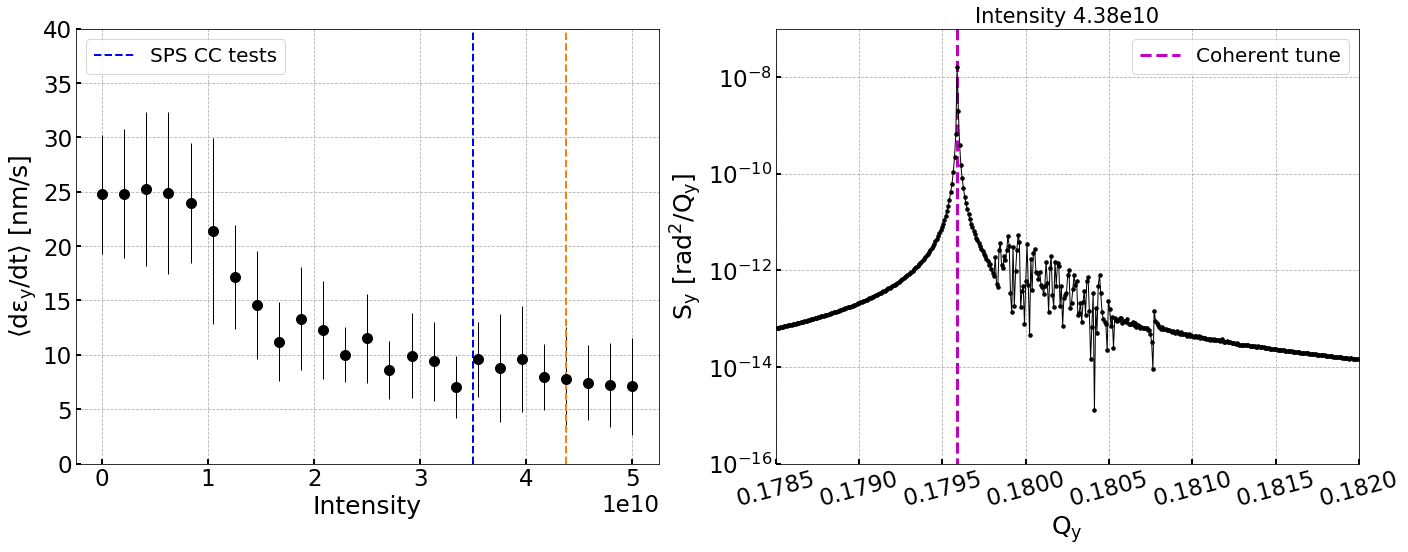

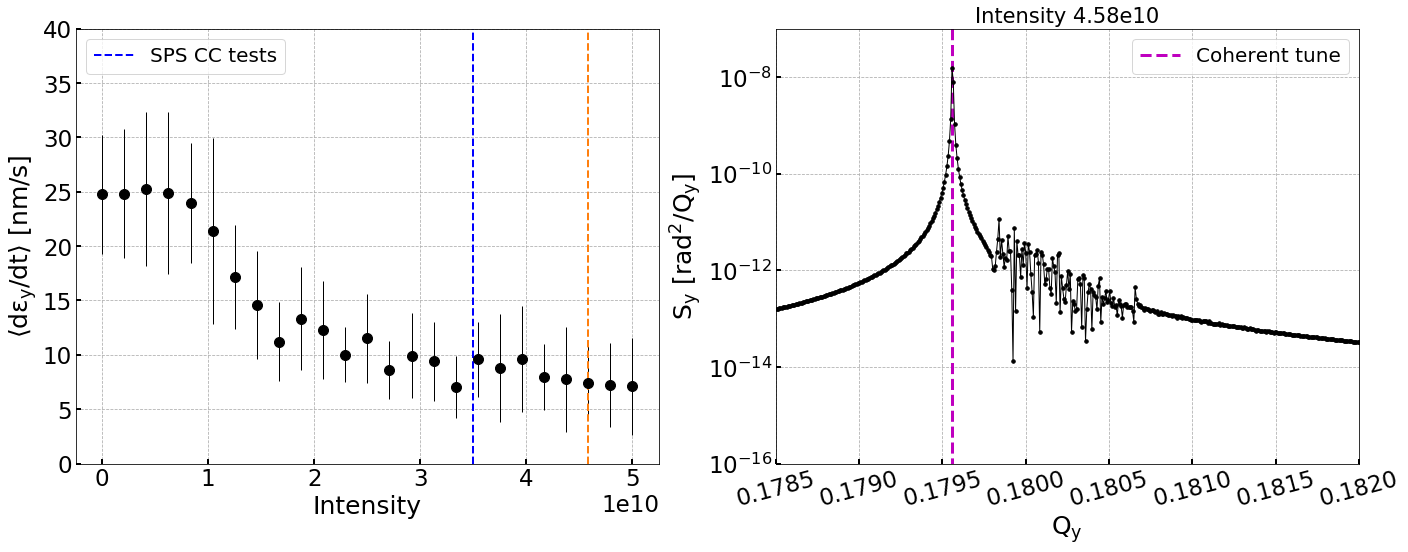

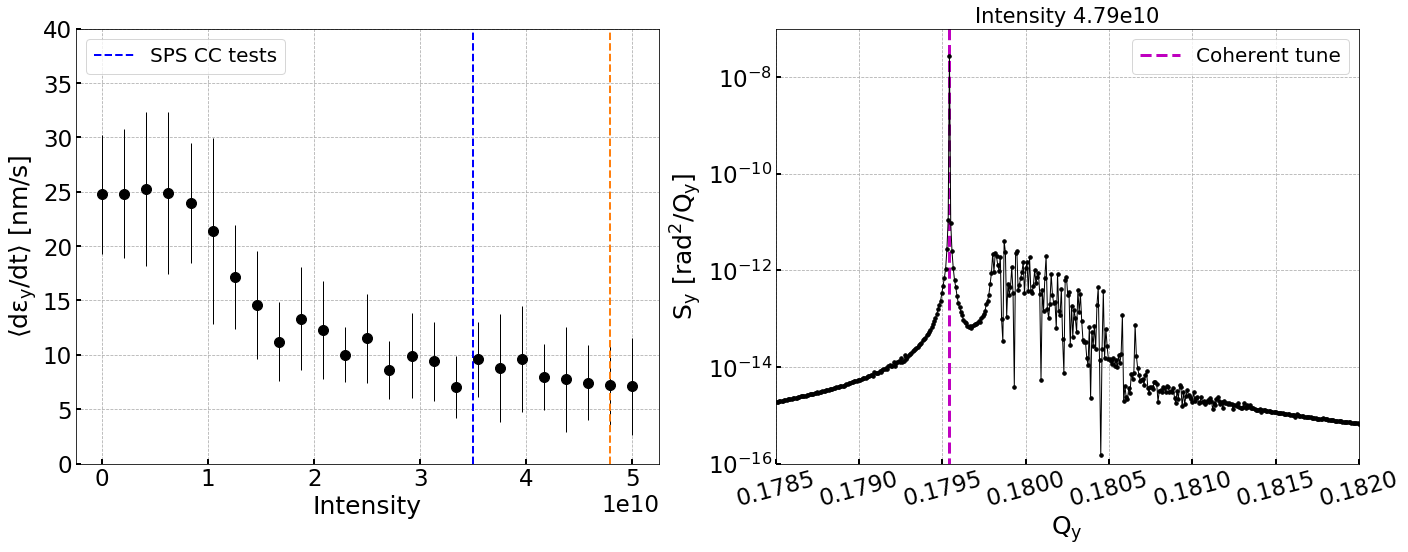

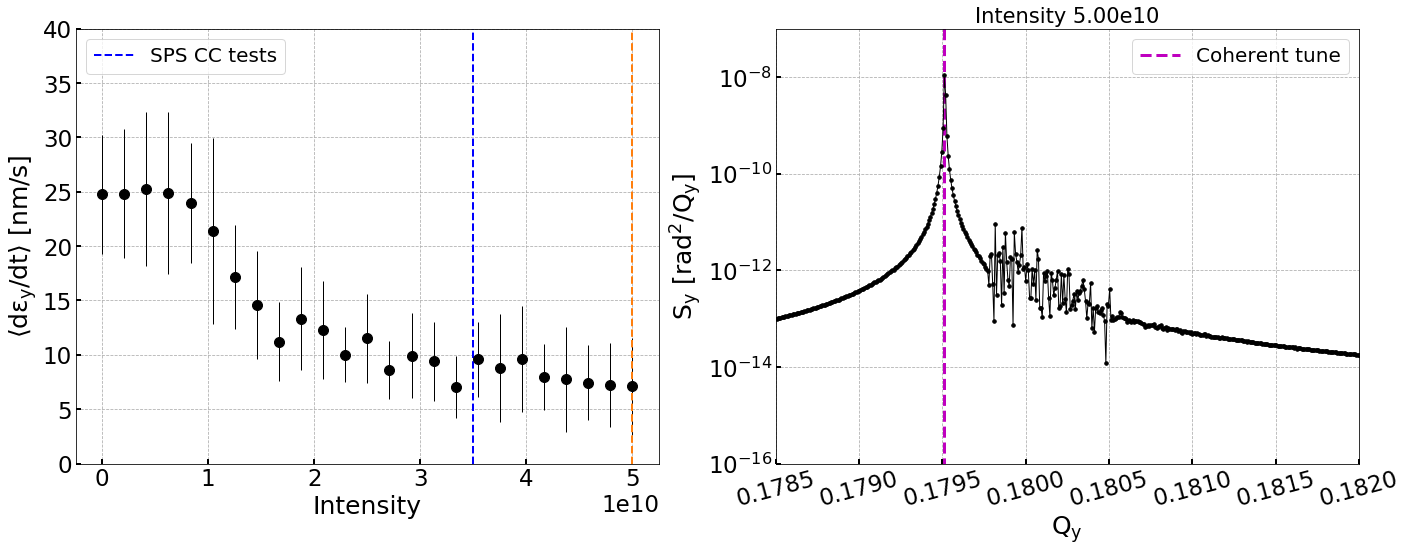

In [77]:
for intensity in intensity_scan:

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(23,8))
    
    # plot <dey/dt> vs intensity
    ax1.errorbar(intensity_scan, np.array(mean_dey)*1e9 , yerr=np.array(err_dey)*1e9, marker='o', ms=10, ls='', c='k')#, label=my_label_1)
    
    # add vertical line with the intensity value during the SPS CC tests
    ax1.vlines(3.5e10, 0, 40, color='b', linewidth=2, linestyle='dashed', label='SPS CC tests')
    
    # add vertical line at the current value of intensity
    ax1.vlines(intensity, 0, 40, color='C1', linewidth=2, linestyle='dashed')
    
    
    ax1.set_xlabel('Intensity')
    ax1.set_ylabel(r'$\mathrm{\langle d\epsilon_y / dt \rangle \ [nm/s] }$')

    # styling
    ax1.tick_params(axis='both', which='both', direction='in', length=5, width=2)
    ax1.set_ylim(0, 40)
    ax1.grid(linestyle='dashed')
    ax1.legend(loc=2)
   
    # plot PSD for current intensity
    
    meanY_temp = df[f'intensity_{intensity/1e10:.2f}e10']['meanY']
    fft = np.fft.fft(meanY_temp)
    n = meanY_temp.size
    freq = np.fft.fftfreq(n)
        
    # cmpt psd
    freq_psd, psd = cmpt_psd(n_turns, frev, fft)
    ax2.plot(np.fft.fftshift(freq_psd)/frev, np.fft.fftshift(psd),'.-', c='k')
    
    # cmpt tune
    a = np.abs(fft[:n//2])
    tune_freq=find_tune(a) 
        
    #ax.plot(freq[:n//2], np.abs(fft[:n//2]*1/n), '.-', c='k')
        
    ax2.vlines(freq[:n//2][tune_freq], 0, 0.000002, lw=3, ls='--', color='m', label='Coherent tune') # plot tune
    print(f'tune freq {freq[:n//2][tune_freq]}') 
    
 
    ax2.set_title(f'Intensity {intensity/1e10:.2f}e10')

    ax2.set_ylim(1e-16, 1e-7)
    ax2.set_xlim(0.1785,0.182)
    
    
    # styling
    ax2.grid(linestyle='--')
    
    
    ax2.tick_params(axis='x', rotation=15)
    ax2.tick_params(axis='both', which='both', direction='in', length=5, width=2)

    ax2.set_yscale('log')
    ax2.locator_params(axis='x', nbins=10)
    
    ax2.set_xlabel(r'$\mathrm{Q_y}$')
    ax2.set_ylabel(r'$\mathrm{S_y \ [rad^2/Q_y]}$') # not entirely sure, discuss it with Hannes.
    ax2.grid(linestyle='dashed')

    ax2.legend(loc=1)
    

    savefig = True
    if savefig:
        plt.savefig(f'output/IntensityScanVSPSD_{study_name}_intensity{intensity/1e10:.2f}e10.png', bbox_inches='tight')

In [ ]:
# cmpt psd instead of tune

In [88]:
meanX, meanY = np.loadtxt(path2data+f'{study_name}/file.txt', delimiter = ",", unpack = True)

In [89]:
fft = np.fft.fft(meanY)
n = meanY.size
freq = np.fft.fftfreq(n)

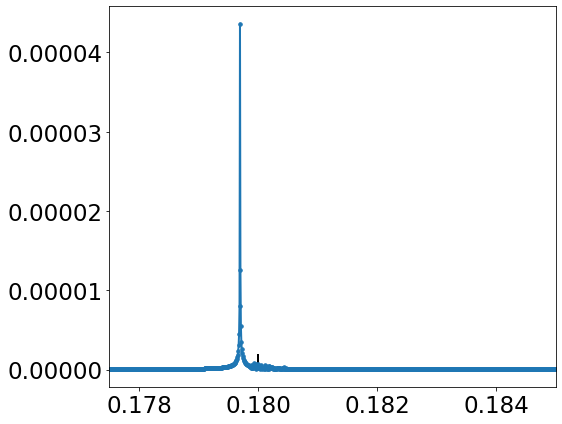

In [90]:
plt.plot(freq[:n//2], np.abs(fft[:n//2]*1/n), '.-')
plt.xlim(0.1775,0.185)
plt.vlines(0.18, 0, 0.000002, color='k')

In [91]:
# compute the expected amplitue detuning
a_yy=6000.0
a_xy=0.0

In [92]:
# Load the initial bunch to compute the initial Jx,Jy
bunch = pickle.load(open(f'{path2data}{study_name}/bunch2', 'rb'))


In [93]:

# Optics at the start of the lattice
beta_y = 73.81671646
beta_x = 30.31164764
alpha_y = 0
alpha_x = 0

# Coordinates
x, px = bunch.x, bunch.xp
y, py =  bunch.y, bunch.yp

# Normalised coordinates 
x_n, px_n = cmpt_normalised_coordinates(x, px, beta_x, alpha_x)
y_n, py_n = cmpt_normalised_coordinates(y, py, beta_y, alpha_y)


# Compute actions
Jx_init = cmpt_actions(x_n, px_n)
Jy_init = cmpt_actions(y_n, py_n)


rms_Jx_init = np.std(Jx_init)
rms_Jy_init = np.std(Jy_init)

print(f'rms(Jx)={rms_Jx_init} m')
print(f'rms(Jy)={rms_Jy_init} m')

rms(Jx)=7.075292343324879e-09 m
rms(Jy)=6.94837449250389e-09 m


In [94]:
expected_DQ = amplitude_detuning_y(Jx_init, Jy_init, a_yy, a_xy)

In [95]:
rms_expected_DQ = rms_amplitude_detuning_y(Jy_init, Jx_init, ayy, axy)
print(rms_expected_DQ)

8.490350811989856e-05


In [98]:
# Compute the coherent tune shift from impedance

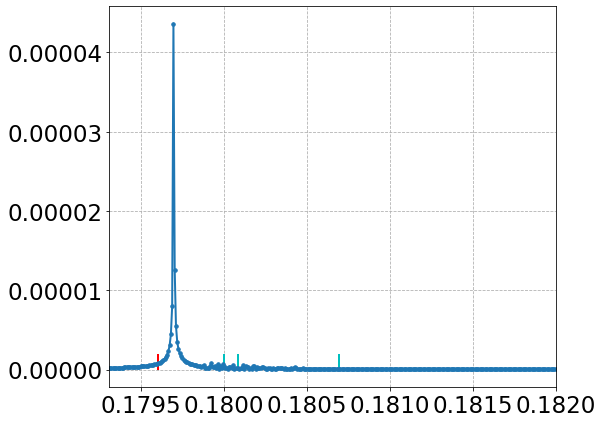

In [100]:
plt.plot(freq[:n//2], np.abs(fft[:n//2]*1/n), '.-')

plt.vlines(0.18, 0, 0.000002, color='c')
plt.vlines(0.18+rms_expected_DQ, 0, 0.000002, color='c')
plt.vlines(0.18+np.max(expected_DQ), 0, 0.000002, color='c')
plt.vlines(0.18-4e-4 , 0, 0.000002, color='r')

plt.xlim(0.18-np.max(expected_DQ),0.182)
#plt.ylim(0,0.00001)
plt.grid(linestyle='--')